<a href="https://colab.research.google.com/github/Deba951/Hyperspectral_Image_Analysis_Learning/blob/main/Auto_Encoders_for_Land_Cover_Classification_of_Hyperspectral_Images_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Encoders for Land Cover Classification in Hyperspectral Images

## Download Data

In [26]:
# %cd /content/drive/MyDrive

!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

URL transformed to HTTPS due to an HSTS policy
--2023-09-23 17:28:03--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat.1’

PaviaU.mat.1        100%[===================>]  33.19M   204KB/s    in 2m 37s  

2023-09-23 17:30:40 (217 KB/s) - ‘PaviaU.mat.1’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2023-09-23 17:30:40--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11005 (11K)
Saving to: ‘PaviaU_gt.mat.1’

PaviaU_gt.mat.1     100%[===================>]  10.75K  --.-KB/s    in 0s      

2023-09-23 17:30:41 (107 MB/s) - ‘PaviaU_gt.mat.1’ saved [11005/11005]

FINISHED --2023-09-23 17:30:4

In [27]:
!pip install earthpy

## Import Libraries

In [28]:
# import matplotlib.pyplot as plt

# import numpy as np
# import earthpy.plot as ep
# import seaborn as sns
# import earthpy.spatial as es

# import plotly.graph_objects as go
# import plotly.express as px

# from scipy.io import loadmat

# import pandas as pd

# from sklearn.preprocessing import minmax_scale
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import (accuracy_score,
#                              confusion_matrix, classification_report)

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model

# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# from tqdm import tqdm
# from numpy.random import seed
# from time import time

# seed(11)




import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tqdm import tqdm
from numpy.random import seed
from time import time

## Load Data

In [29]:
ls

logs/            PaviaU.mat                    PU_AE_train_data.csv
PaviaU_gt.mat    PaviaU.mat.1                  sample_data/
PaviaU_gt.mat.1  Pavia_University_AE_Model.h5


In [30]:
data = loadmat('PaviaU.mat')['paviaU']

gt = loadmat('PaviaU_gt.mat')['paviaU_gt']

print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands: {data.shape[-1]}')

Data Shape: (610, 340)
Number of Bands: 103


In [31]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

In [32]:
df.shape

(207400, 104)

In [33]:
df.head()

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0    647    499    464    371    291    319    365    322    296     305  ...   
1    604    546    527    455    378    377    336    314    324     329  ...   
2    621    746    556    360    285    300    274    276    332     319  ...   
3    637    592    482    556    508    284    178    198    193     224  ...   
4    625    560    480    360    377    341    264    208    231     266  ...   

   band95  band96  band97  band98  band99  band100  band101  band102  band103  \
0    3416    3335    3256    3226    3205     3210     3221     3238     3250   
1    2583    2538    2509    2511    2501     2468     2442     2464     2528   
2    2288    2242    2193    2202    2225     2266     2308     2345     2361   
3    2675    2609    2541    2551    2571     2569     2573     2620     2644   
4    2392    2344    2289    2328    2415     2424     2386     2431     2456   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 104 columns]

### Description of Classes

|Label |Class	|Samples|
|------|------|-------|
|1	|Asphalt	|6631
|2	|Meadows	|18649
|3	|Gravel	|2099
|4	|Trees	|3064
|5	|Painted metal sheets	|1345
|6	|Bare Soil	|5029
|7	|Bitumen	|1330
|8	|Self-Blocking Bricks	|3682
|9	|Shadows	|947



## Data Visualization

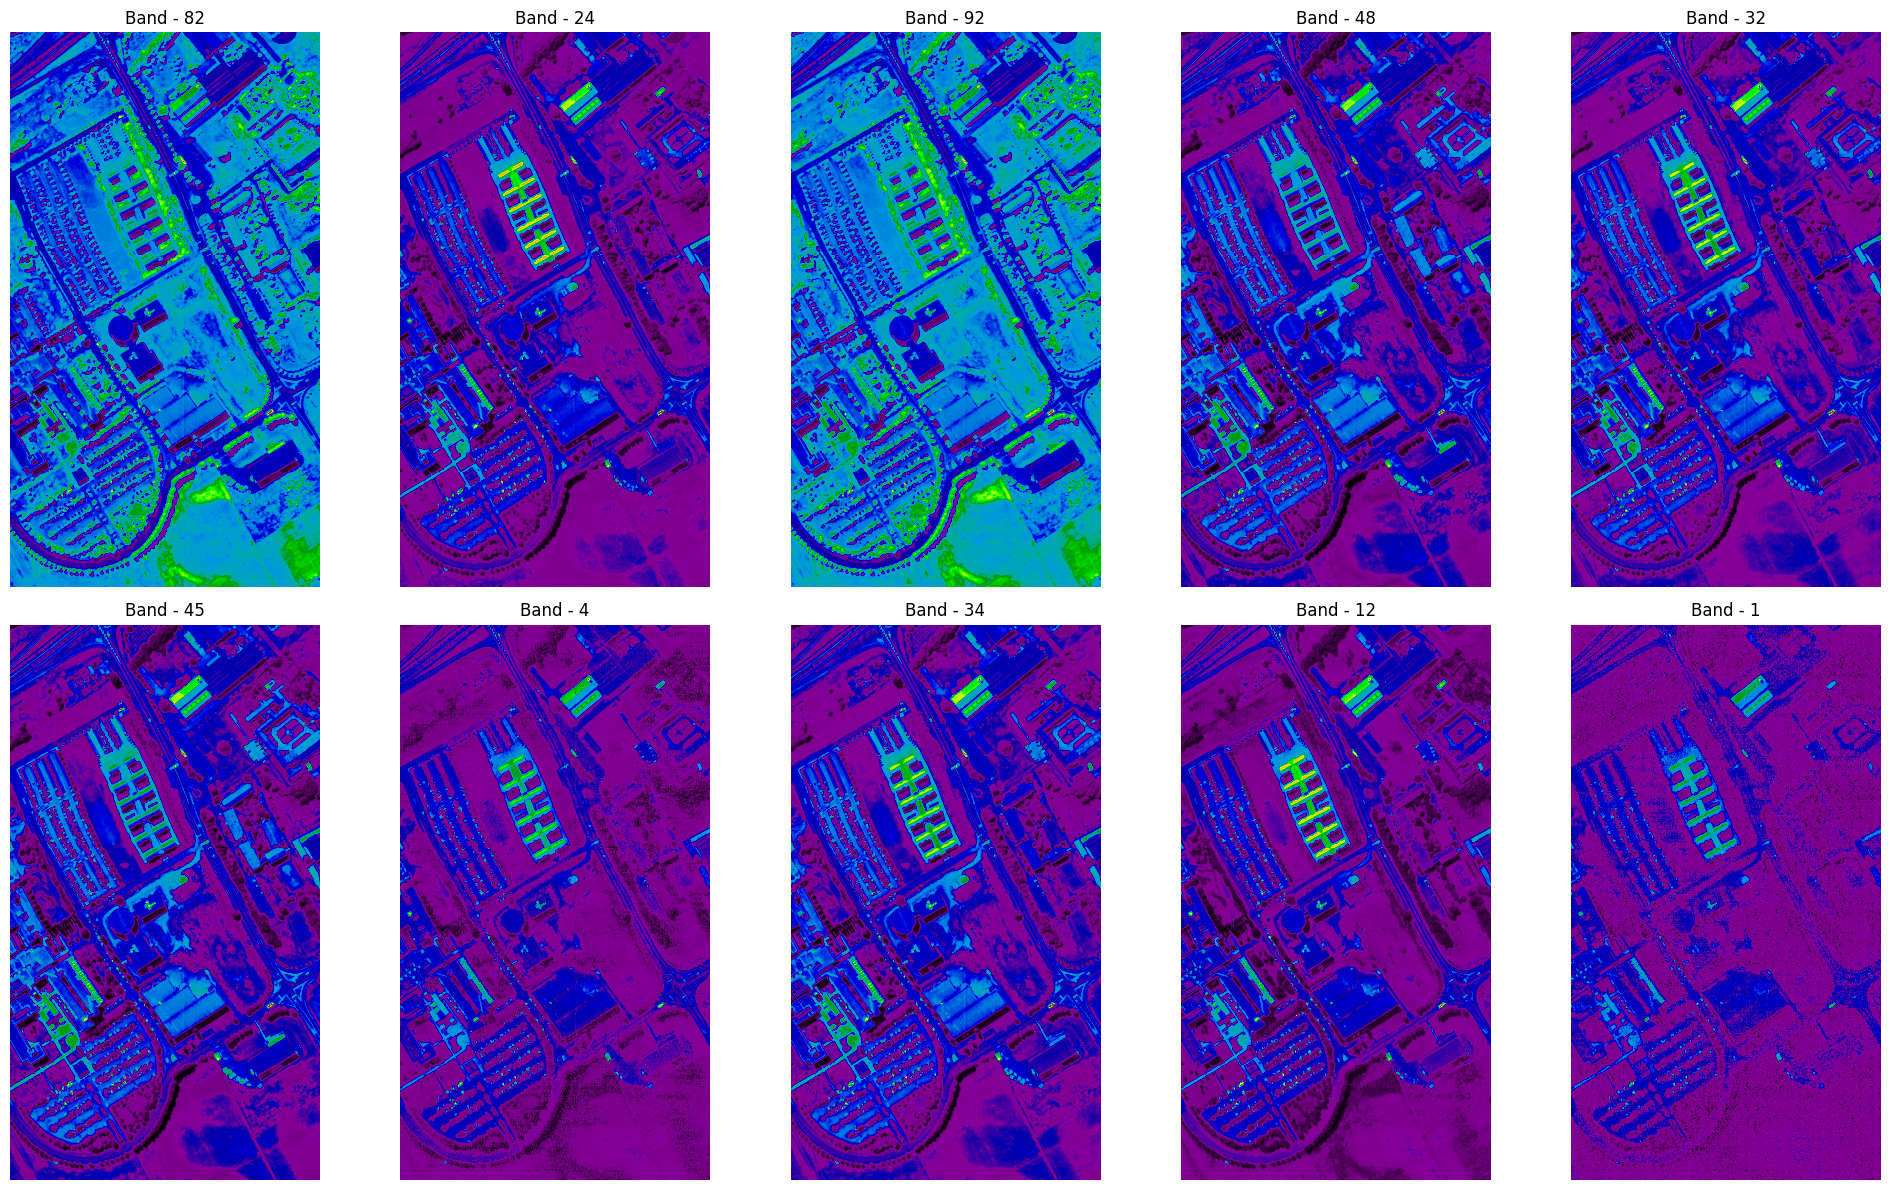

In [34]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()


### RGB Composite Image Visualization

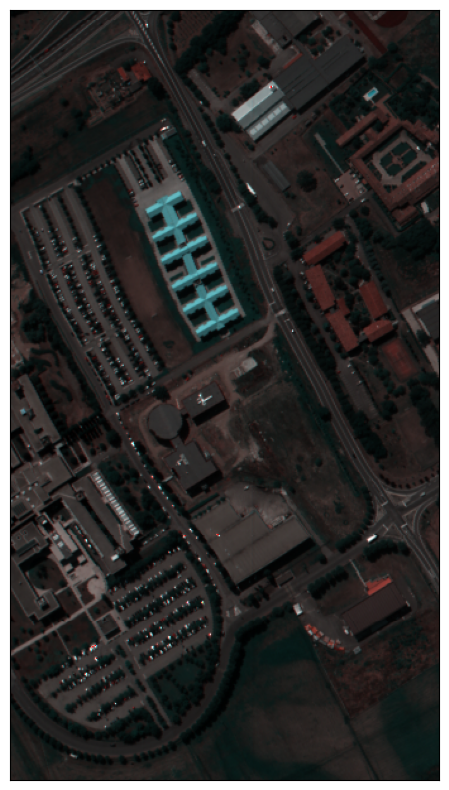

In [35]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10))

plt.show()

## Ground Truth Visualization

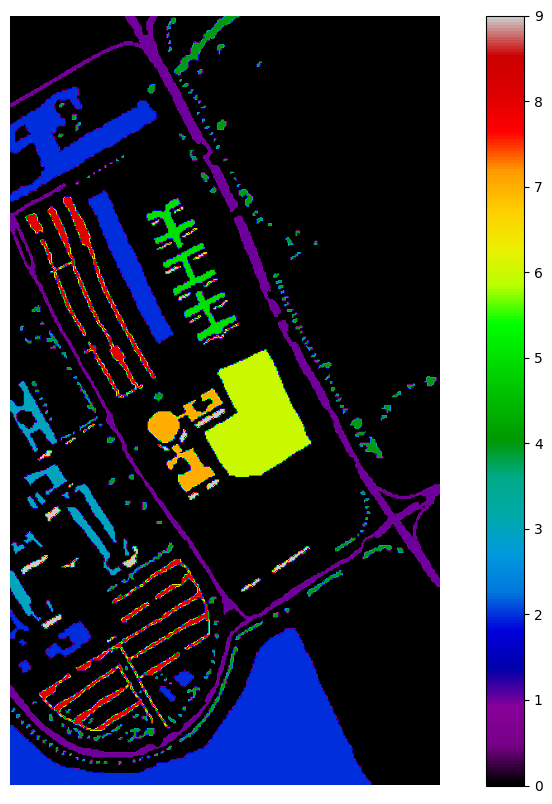

In [36]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)

## Scaling Data

In [37]:
ind = ['band'+str(i) for i in range(1, 103+1)]

X = df.loc[:, ind]

X_scaled = minmax_scale(X, axis = 0);

len(X_scaled[1])

103

In [38]:
# define the number of features
ncol = X_scaled.shape[1]
ncol

103

## Auto Encoder

In [39]:
# encoder dimension
encoding_dim = 60

In [40]:
input_dim = Input(shape = (ncol, ), name = 'InputLayer')

# Encoder Layers
encoded1 = Dense(100, activation = 'relu', name = 'EncodeLayer1')(input_dim)
encoded2 = Dense(90, activation = 'relu', name = 'EncodeLayer2')(encoded1)
encoded3 = Dense(85, activation = 'relu', name = 'EncodeLayer3')(encoded2)
encoded4 = Dense(80, activation = 'relu', name = 'EncodeLayer4')(encoded3)
encoded5 = Dense(75, activation = 'relu', name = 'EncodeLayer5')(encoded4)
encoded6 = Dense(70, activation = 'relu', name = 'EncodeLayer6')(encoded5)

# Coded Part
encoded7 = Dense(encoding_dim, activation = 'linear', name = 'CodeLayer')(encoded6)

# Decoder Layers
decoded1 = Dense(70, activation = 'relu', name = 'DecodeLayer1')(encoded7)
decoded2 = Dense(75, activation = 'relu', name = 'DecodeLayer2')(decoded1)
decoded3 = Dense(80, activation = 'relu', name = 'DecodeLayer3')(decoded2)
decoded4 = Dense(85, activation = 'relu', name = 'DecodeLayer4')(decoded3)
decoded5 = Dense(90, activation = 'relu', name = 'DecodeLayer5')(decoded4)
decoded6 = Dense(100, activation = 'relu', name = 'DecodeLayer6')(decoded5)
decoded7 = Dense(ncol, activation = 'sigmoid', name = 'OutputLayer')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 103)]             0         
                                                                 
 EncodeLayer1 (Dense)        (None, 100)               10400     
                                                                 
 EncodeLayer2 (Dense)        (None, 90)                9090      
                                                                 
 EncodeLayer3 (Dense)        (None, 85)                7735      
                                                                 
 EncodeLayer4 (Dense)        (None, 80)                6880      
                                                                 
 EncodeLayer5 (Dense)        (None, 75)                6075      
                                                                 
 EncodeLayer6 (Dense)        (None, 70)                5320

In [41]:

autoencoder.compile(optimizer = 'adam',
                    loss = 'mse',
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    )



In [42]:
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_AE_Model.h5',
                             monitor = 'mean_squared_logarithmic_error',
                             mode ='min',
                             save_best_only = True)

tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))


In [43]:
hist = autoencoder.fit(X_scaled,
                       X_scaled,
                       epochs = 100,
                       batch_size = 256 ,
                       shuffle = True,
                       callbacks=[early_stop,
                                  checkpoint,
                                  tensorboard])


Epoch 1/100
809/811 [============================>.] - ETA: 0s - loss: 0.0038 - mean_squared_logarithmic_error: 0.0024

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



811/811 [==============================] - 20s 21ms/step - loss: 0.0038 - mean_squared_logarithmic_error: 0.0024
Epoch 2/100
811/811 [==============================] - 16s 20ms/step - loss: 1.0478e-04 - mean_squared_logarithmic_error: 7.0747e-05
Epoch 3/100
811/811 [==============================] - 16s 20ms/step - loss: 9.3186e-05 - mean_squared_logarithmic_error: 6.3724e-05
Epoch 4/100
811/811 [==============================] - 9s 11ms/step - loss: 8.7261e-05 - mean_squared_logarithmic_error: 5.9839e-05
Epoch 5/100
811/811 [==============================] - 7s 8ms/step - loss: 8.5811e-05 - mean_squared_logarithmic_error: 5.9116e-05
Epoch 6/100
811/811 [==============================] - 8s 10ms/step - loss: 8.3794e-05 - mean_squared_logarithmic_error: 5.7903e-05
Epoch 7/100
811/811 [==============================] - 9s 11ms/step - loss: 8.4590e-05 - mean_squared_logarithmic_error: 5.8476e-05
Epoch 8/100
811/811 [==============================] - 7s 9ms/step - loss: 8.1004e-05 - mean_s

## Visualize Training Details

In [44]:
%load_ext tensorboard

%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1798), started 0:36:57 ago. (Use '!kill 1798' to kill it.)

<IPython.core.display.Javascript object>

In [45]:
history = pd.DataFrame(data= hist.history)

history.to_csv('PU_AE_train_data.csv')

history.head()


loss  mean_squared_logarithmic_error
0  0.003833                        0.002425
1  0.000105                        0.000071
2  0.000093                        0.000064
3  0.000087                        0.000060
4  0.000086                        0.000059

In [46]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x = hist.index, y = hist.loss.values,
#                     mode='lines+markers',
#                     name='Train Loss'))
# fig.add_trace(go.Scatter(x = hist.index, y = hist.accuracy.values,
#                     mode='lines+markers',
#                     name='Train Accuracy'))


# fig.show()





fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.epoch, y=hist.history['loss'],
                    mode='lines+markers',
                    name='Train Loss'))
fig.add_trace(go.Scatter(x=hist.epoch, y=hist.history['mean_squared_logarithmic_error'],
                    mode='lines+markers',
                    name='Mean Squared Logarithmic Error'))
fig.show()

## Encoding Data

In [47]:
# Seperate encoder part from the auto encoder model

encoder = Model(inputs = input_dim, outputs = encoded7)

# encoded_input = Input(shape = (encoding_dim, ))

In [48]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 103)]             0         
                                                                 
 EncodeLayer1 (Dense)        (None, 100)               10400     
                                                                 
 EncodeLayer2 (Dense)        (None, 90)                9090      
                                                                 
 EncodeLayer3 (Dense)        (None, 85)                7735      
                                                                 
 EncodeLayer4 (Dense)        (None, 80)                6880      
                                                                 
 EncodeLayer5 (Dense)        (None, 75)                6075      
                                                                 
 EncodeLayer6 (Dense)        (None, 70)                5320

In [49]:
# Get the data with the reduced dimesion

encoded_X = pd.DataFrame(encoder.predict(X_scaled))

encoded_X = encoded_X.add_prefix('feature_')

6482/6482 [==============================] - 10s 2ms/step


In [50]:
# Add the class labels for classification purposes

encoded_X['class'] = df.loc[:,['class']]

In [51]:
encoded_X.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.468460   0.027105  -0.178009  -0.015655   0.025255   0.504108   
1   0.476658   0.102584  -0.257442   0.020763  -0.015521   0.495385   
2   0.514938   0.111584  -0.245798   0.018250   0.018674   0.574926   
3   0.524780   0.064600  -0.189691  -0.031076  -0.047383   0.520553   
4   0.517629   0.051407  -0.179988  -0.008288  -0.013985   0.525577   

   feature_6  feature_7  feature_8  feature_9  ...  feature_51  feature_52  \
0   0.917665  -0.288368  -0.170645   0.285524  ...   -0.248340    0.354069   
1   0.890379  -0.275284  -0.286496   0.311890  ...   -0.228745    0.389806   
2   0.974400  -0.263965  -0.316362   0.378339  ...   -0.210097    0.430035   
3   0.992266  -0.270670  -0.274067   0.369130  ...   -0.186000    0.393076   
4   0.923007  -0.247734  -0.293468   0.361030  ...   -0.122707    0.385992   

   feature_53  feature_54  feature_55  feature_56  feature_57  feature_58  \
0    0.048725    0.210870    0.017832   -0.445930   -0.465183   -0.021733   
1    0.019572    0.193597   -0.010942   -0.437551   -0.445524    0.015930   
2    0.025384    0.131111   -0.037301   -0.444731   -0.479484    0.051623   
3    0.040829    0.164385    0.006965   -0.476917   -0.462083    0.018068   
4    0.000262    0.182413    0.018936   -0.396177   -0.433046    0.008420   

   feature_59  class  
0   -0.296143      0  
1   -0.247324      0  
2   -0.253323      0  
3   -0.263507      0  
4   -0.228968      0  

[5 rows x 61 columns]

In [52]:
encoded_X.describe()

feature_0      feature_1      feature_2      feature_3  \
count  207400.000000  207400.000000  207400.000000  207400.000000   
mean        0.332977       0.012476      -0.089924       0.025197   
std         0.135781       0.077989       0.098129       0.043500   
min        -0.187219      -0.595877      -0.666680      -0.661530   
25%         0.249555      -0.038741      -0.124605      -0.005211   
50%         0.317900      -0.003460      -0.071470       0.022462   
75%         0.390098       0.047616      -0.033787       0.053700   
max         1.104663       0.442833       0.970340       0.596599   

           feature_4      feature_5      feature_6      feature_7  \
count  207400.000000  207400.000000  207400.000000  207400.000000   
mean        0.005751       0.383163       0.510186      -0.073590   
std         0.043773       0.140892       0.263297       0.094316   
min        -0.530346      -0.075994      -0.462222      -0.439615   
25%        -0.018920       0.302503       0.345649      -0.134139   
50%         0.003791       0.370237       0.488499      -0.048224   
75%         0.027471       0.430519       0.648835       0.004023   
max         0.419861       1.287239       1.770383       0.186023   

           feature_8      feature_9  ...     feature_51     feature_52  \
count  207400.000000  207400.000000  ...  207400.000000  207400.000000   
mean       -0.182710       0.267405  ...      -0.008353       0.202291   
std         0.153827       0.116902  ...       0.098577       0.128641   
min        -1.067592      -0.086911  ...      -1.037058      -0.402710   
25%        -0.238321       0.203506  ...      -0.057903       0.132324   
50%        -0.153270       0.245399  ...       0.018991       0.189138   
75%        -0.091412       0.298622  ...       0.058687       0.251458   
max         0.564748       1.062801  ...       0.248385       0.903459   

          feature_53     feature_54     feature_55     feature_56  \
count  207400.000000  207400.000000  207400.000000  207400.000000   
mean       -0.033187       0.076921       0.074554      -0.130609   
std         0.036580       0.088028       0.067831       0.132871   
min        -0.344095      -0.420778      -0.841917      -0.581638   
25%        -0.052516       0.009762       0.053158      -0.215366   
50%        -0.031866       0.061205       0.086660      -0.128645   
75%        -0.014364       0.132561       0.112103      -0.049146   
max         0.448849       0.839853       0.587042       0.969282   

          feature_57     feature_58     feature_59          class  
count  207400.000000  207400.000000  207400.000000  207400.000000  
mean       -0.245866       0.000413      -0.045235       0.707184  
std         0.134758       0.050239       0.106998       1.753377  
min        -0.995417      -0.564463      -0.421300       0.000000  
25%        -0.306850      -0.025285      -0.113066       0.000000  
50%        -0.230817       0.006666      -0.035732       0.000000  
75%        -0.166417       0.037425       0.048262       0.000000  
max         0.243102       0.201525       0.403831       9.000000  

[8 rows x 61 columns]

In [53]:
encoded_X.to_csv('AE_PU_data.csv')



---

---



